# Определение перспективного тарифа для телеком компании

### Описание тарифов
**Тариф «Смарт»**
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
  * минута разговора: 3 рубля
  * сообщение: 3 рубля
  * 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
  * минута разговора: 1 рубль
  * сообщение: 1 рубль
  * 1 Гб интернет-трафика: 150 рублей

## Оглавление

<a href='#1'>1. Знакомство с данными</a>
* <a href='#1.1'>1.1 Изучим общую информацию по таблице 'users'</a>
* <a href='#1.2'>1.2 Изучим общую информацию по таблице 'calls'</a>
* <a href='#1.3'>1.3 Изучим общую информацию по таблице 'messages'</a>
* <a href='#1.4'>1.4 Изучим общую информацию по таблице 'internet'</a>
* <a href='#1.5'>1.5 Изучим общую информацию по таблице 'tariffs'</a>

<a href='#2'>2. Добавление новых данных</a>
* <a href='#2.1'>2.1 Количество сделанных звонков и израсходованных минут разговора по месяцам</a>
* <a href='#2.2'>2.2 Количество отправленных сообщений по месяцам</a>
* <a href='#2.3'>2.3 Объем израсходованного интернет-трафика по месяцам</a>
* <a href='#2.4'>2.4 Объединим данные в одну общую таблицу</a>
* <a href='#2.5'>2.5 Помесячная выручка с каждого пользователя</a>

<a href='#3'>3. Статистический анализ данных</a>
* <a href='#3.1'>3.1 Сколько минут разговора требуется пользователям каждого тарифа в месяц</a>
* <a href='#3.2'>3.2 Сколько сообщений требуется пользователям каждого тарифа в месяц</a>
* <a href='#3.3'>3.3 Какой объём интернет-трафика требуется пользователям каждого тарифа в месяц</a>

<a href='#4'>4. Проверка гипотез</a>
* <a href='#4.1'>4.1 Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается</a>
* <a href='#4.2'>4.2 Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов</a>

<a href='#5'>5. Общий вывод</a>

<a id='1'></a>
# Шаг 1. Знакомство с данными


In [2]:
#Импорт библиотек

import pandas as pd #для описания и анализа данных
import matplotlib.pyplot as plt # для работы с графиками
#магия, чтобы график был сразу после выполнения кода
%matplotlib inline 
import numpy as np # для эффективной работы с вычислениями и большими массивами

In [3]:
#Открываем наши данные

users = pd.read_csv('users.csv')
calls = pd.read_csv('calls.csv')
messages = pd.read_csv('messages.csv')
internet = pd.read_csv('internet.csv')
tariffs = pd.read_csv('tariffs.csv')

<a id='1.1'></a>
### 1.1 Изучим общую информацию по таблице 'users'

**Выведем информацию на экран**

In [3]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


***Описание данных***

* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

***Проверим, данные точно за один год или нет***

In [4]:
print(users['reg_date'].min())
print(users['reg_date'].max())

2018-01-01
2018-12-31


**Проверим на дубликаты, пропуски и тип данных**

In [5]:
users.info()
display(users.duplicated().sum())
users['churn_date'].isna().mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


0

0.924

* В столбце **'churn_date'** практически все значения пропущены, в условии сказано, что если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Будем иметь это в виду и оставим пропуски без изменений.
* Дубликатов не обнаружено, это хорошо.
* Необходимо заменить тип данных в столбце **'reg_date'** на datetime.


***Замена типа данных***


In [6]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

***Сгруппируем данные по городам и посмотрим, где тариф наиболее популярен***

In [7]:
users_gr = users.pivot_table(index='city', values = 'user_id', aggfunc='count').sort_values(by='user_id', ascending=False)
users_gr

,user_id
city,
Москва,99
Санкт-Петербург,39
Новосибирск,16
Казань,14
Омск,14
...,...
Подольск,1
Химки,1
Иваново,1


Как и ожидалось, в Мск и Спб больше всего пользователей, которые используют данный тариф. Надо сказать, что и численность там выше, поэтому данные просто для сведения нам.
Интересно, а много городов, где тариф только у одного пользователя?

In [8]:
users_gr.query('user_id == 1').count()

user_id    5
dtype: int64

Нет, таких городов немного. Проверим также наши данные по возрасту на выбросы или случайные значения с помощью функции describe()


In [9]:
users['age'].describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

Все довольно адекватно.

***Создадим дополнительный столбец с месяцем подключения тарифа***

In [10]:
users['month'] = users['reg_date'].values.astype('datetime64[M]')

users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-01
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,2018-11-01
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,2018-06-01
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,2018-08-01
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,2018-05-01


<a id='1.2'></a>
### 1.2 Изучим общую информацию по таблице 'calls'

**«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.**

In [11]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


***Описание данных***

* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

In [12]:
calls.info()
calls.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


0

* В данной таблице нет пропущенных значений и дубликатов
* Столбец **'call_date '** имеет тип данных object, необходимо заменить на дату

***Замена типа данных***

In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

***Изучим внимательнее столбец с данными по длительности звонков 'duration'***

- *проверим, насколько много звонков с длительностью в 0,0 минут*
- *помним, что сказано в условии - «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

In [14]:
calls.query('duration == 0.00').count()/len(calls)


id           0.195516
call_date    0.195516
duration     0.195516
user_id      0.195516
dtype: float64

* примерно 20% всех звонков по длительности равны 0. Возможно, линия была занята при звонке и он сбросился или связи не было. Стоимость таких звонков 0 руб., для нашего анализа никакими полезными сведениями эти данные не обладают, значит, можно их удалить. (используем метод замены значений и при удалении воспользуемся знакомой функцией dropna())
* исходя из условия 'Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута', округлим значения до 1 минуты.


In [15]:
#удаляем пропущенные значения
calls['duration'] = calls['duration'].replace(0, np.NaN)
calls = calls.dropna()

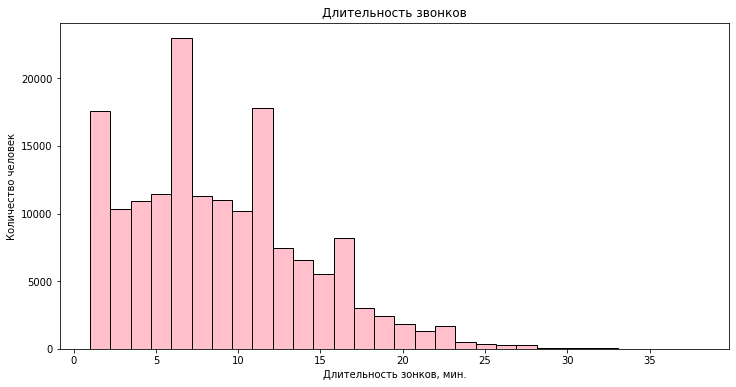

In [16]:
#огругляем к большему значению
calls['duration'] = calls['duration'].apply(np.ceil)

#визуализируем для наглядности
calls['duration'].plot(kind='hist', bins=30, figsize=(12,6), ec='black', color='pink', title='Длительность звонков')
plt.xlabel('Длительность зонков, мин.')
plt.ylabel('Количество человек')
plt.show()

***Сгруппируем данные месяцу***

In [17]:
calls['month'] = calls['call_date'].values.astype('datetime64[M]')
calls.head()

,id,call_date,duration,user_id,month
2,1000_2,2018-06-11,3.0,1000,2018-06-01
3,1000_3,2018-09-21,14.0,1000,2018-09-01
4,1000_4,2018-12-15,6.0,1000,2018-12-01
7,1000_7,2018-08-22,19.0,1000,2018-08-01
8,1000_8,2018-09-15,19.0,1000,2018-09-01


<a id='1.3'></a>
### 1.3 Изучим общую информацию по таблице 'messages'

In [18]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


***Описание данных***

* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

In [19]:
messages.info()
messages.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


0

**```Комментарий 3 - 'messages'```**

* В таблице 'messages' нет пропущенных значений и дубликатов.
* Столбец **'message_date '** имеет тип данных object, необходимо заменить на дату
* Добавим новый столбец с месяцем

***Замена типа данных***

In [20]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [21]:
messages['month'] = messages['message_date'].values.astype('datetime64[M]')
messages.head()


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,2018-06-01
1,1000_1,2018-10-08,1000,2018-10-01
2,1000_2,2018-08-04,1000,2018-08-01
3,1000_3,2018-06-16,1000,2018-06-01
4,1000_4,2018-12-05,1000,2018-12-01


<a id='1.4'></a>
### 1.4 Изучим общую информацию по таблице 'internet'

In [22]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


***Описание данных***

* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

In [23]:
internet.info()
internet.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


0

* В таблице 'internet' нет пропущенных значений и дубликатов.
* Столбец **'session_date'** имеет тип данных object, необходимо заменить на дату.
* Из условия известно, что «Мегалайн» всегда округляет вверх значения не только минут, но и мегабайтов, поэтому округлим все значения по столбцу 'mb_used' в большую сторону.

In [24]:
#Заменим тип данных
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

#Округлим значения мегабайтов в большую сторону
internet['mb_used'] = internet['mb_used'].apply(np.ceil)

In [25]:
#Добавим столбец с месяцем

internet['month'] = internet['session_date'].values.astype('datetime64[M]')
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,113.0,2018-11-25,1000,2018-11-01
1,1,1000_1,1053.0,2018-09-07,1000,2018-09-01
2,2,1000_2,1198.0,2018-06-25,1000,2018-06-01
3,3,1000_3,551.0,2018-08-22,1000,2018-08-01
4,4,1000_4,303.0,2018-09-24,1000,2018-09-01


<a id='1.5'></a>
### 1.5 Изучим общую информацию по таблице 'tariffs'

In [26]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


***Описание данных***

* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [27]:
tariffs.info()
tariffs.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


0

* В таблице 'tariffs' нет пропущенных значений и дубликатов, тип данных в столбцах верный. Я так понимаю, что это просто информационная таблица по тарифам, приму к сведению.

### Вывод

* Мы изменили тип данных, где это требовалось
* Приняли во внимание механику учета мегабайтов и минут в абонентской плате, огруглив значения в большую сторону
* Добавили столбец с месяцем для таблиц

<a id='2'></a>
# Шаг 2. Добавление новых данных

<a id='2.1'></a>
### 2.1 Количество сделанных звонков и израсходованных минут разговора по месяцам

In [28]:
calls.head()

,id,call_date,duration,user_id,month
2,1000_2,2018-06-11,3.0,1000,2018-06-01
3,1000_3,2018-09-21,14.0,1000,2018-09-01
4,1000_4,2018-12-15,6.0,1000,2018-12-01
7,1000_7,2018-08-22,19.0,1000,2018-08-01
8,1000_8,2018-09-15,19.0,1000,2018-09-01


In [29]:
calls_info=calls.groupby(['user_id', 'month'])['duration'].agg(['count', 'sum'])
calls_info.columns = ['Количество звонков','Длительность звонков']
calls_info.reset_index()

,user_id,month,Количество звонков,Длительность звонков
0,1000,2018-05-01,17,159.0
1,1000,2018-06-01,28,172.0
2,1000,2018-07-01,41,340.0
3,1000,2018-08-01,42,408.0
4,1000,2018-09-01,46,466.0
...,...,...,...,...
3163,1498,2018-10-01,30,247.0
3164,1499,2018-09-01,8,70.0
3165,1499,2018-10-01,44,449.0
3166,1499,2018-11-01,62,612.0


<a id='2.2'></a>
### 2.2 Количество отправленных сообщений по месяцам

In [30]:
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,2018-06-01
1,1000_1,2018-10-08,1000,2018-10-01
2,1000_2,2018-08-04,1000,2018-08-01
3,1000_3,2018-06-16,1000,2018-06-01
4,1000_4,2018-12-05,1000,2018-12-01


In [31]:
messages_info=messages.groupby(['user_id', 'month'])['message_date'].agg(['count'])
messages_info.columns = ['Количество сообщений']
messages_info.reset_index()

,user_id,month,Количество сообщений
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57
...,...,...,...
2712,1498,2018-10-01,42
2713,1499,2018-09-01,11
2714,1499,2018-10-01,48
2715,1499,2018-11-01,59


<a id='2.3'></a>
### 2.3 Объем израсходованного интернет-трафика по месяцам

In [32]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,113.0,2018-11-25,1000,2018-11-01
1,1,1000_1,1053.0,2018-09-07,1000,2018-09-01
2,2,1000_2,1198.0,2018-06-25,1000,2018-06-01
3,3,1000_3,551.0,2018-08-22,1000,2018-08-01
4,4,1000_4,303.0,2018-09-24,1000,2018-09-01


In [33]:
internet_info=internet.groupby(['user_id', 'month'])['mb_used'].agg(['sum'])
internet_info.columns = ['Сумма трафика']
internet_info.reset_index()


,user_id,month,Сумма трафика
0,1000,2018-05-01,2256.0
1,1000,2018-06-01,23257.0
2,1000,2018-07-01,14016.0
3,1000,2018-08-01,14070.0
4,1000,2018-09-01,14581.0
...,...,...,...
3198,1498,2018-10-01,20604.0
3199,1499,2018-09-01,1848.0
3200,1499,2018-10-01,17809.0
3201,1499,2018-11-01,17984.0


<a id='2.4'></a>
### 2.4 Объединим данные в одну общую таблицу

In [34]:
df = pd.concat([calls_info, messages_info, internet_info], axis=1)
df= df.reset_index()
df

,user_id,month,Количество звонков,Длительность звонков,Количество сообщений,Сумма трафика
0,1000,2018-05-01,17.0,159.0,22.0,2256.0
1,1000,2018-06-01,28.0,172.0,60.0,23257.0
2,1000,2018-07-01,41.0,340.0,75.0,14016.0
3,1000,2018-08-01,42.0,408.0,81.0,14070.0
4,1000,2018-09-01,46.0,466.0,57.0,14581.0
...,...,...,...,...,...,...
3209,1498,2018-10-01,30.0,247.0,42.0,20604.0
3210,1499,2018-09-01,8.0,70.0,11.0,1848.0
3211,1499,2018-10-01,44.0,449.0,48.0,17809.0
3212,1499,2018-11-01,62.0,612.0,59.0,17984.0


In [35]:
df['user_id'].nunique()

498

In [36]:
users['user_id'].nunique()

500

In [37]:
#Добавим тариф
t = dict(pd.Series(users['tariff'].values, index=users['user_id']))
df['Тариф'] = df['user_id'].map(t)

#Добавим город
c = dict(pd.Series(users['city'].values, index=users['user_id']))
df['Город'] = df['user_id'].map(c)
df

,user_id,month,Количество звонков,Длительность звонков,Количество сообщений,Сумма трафика,Тариф,Город
0,1000,2018-05-01,17.0,159.0,22.0,2256.0,ultra,Краснодар
1,1000,2018-06-01,28.0,172.0,60.0,23257.0,ultra,Краснодар
2,1000,2018-07-01,41.0,340.0,75.0,14016.0,ultra,Краснодар
3,1000,2018-08-01,42.0,408.0,81.0,14070.0,ultra,Краснодар
4,1000,2018-09-01,46.0,466.0,57.0,14581.0,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3209,1498,2018-10-01,30.0,247.0,42.0,20604.0,smart,Владикавказ
3210,1499,2018-09-01,8.0,70.0,11.0,1848.0,smart,Пермь
3211,1499,2018-10-01,44.0,449.0,48.0,17809.0,smart,Пермь
3212,1499,2018-11-01,62.0,612.0,59.0,17984.0,smart,Пермь


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 8 columns):
user_id                 3214 non-null int64
month                   3214 non-null datetime64[ns]
Количество звонков      3168 non-null float64
Длительность звонков    3168 non-null float64
Количество сообщений    2717 non-null float64
Сумма трафика           3203 non-null float64
Тариф                   3214 non-null object
Город                   3214 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 201.0+ KB


В общей таблице есть пропуски по звонкам, сообщениям и трафику. Будем считать, что человек просто не пользовался данной функцией и заполним пропуски нулями.

In [39]:
#Заполним пропуски нулями
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 8 columns):
user_id                 3214 non-null int64
month                   3214 non-null datetime64[ns]
Количество звонков      3214 non-null float64
Длительность звонков    3214 non-null float64
Количество сообщений    3214 non-null float64
Сумма трафика           3214 non-null float64
Тариф                   3214 non-null object
Город                   3214 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 201.0+ KB


<a id='2.5'></a>
### 2.5 Помесячная выручка с каждого пользователя


In [40]:
df.sample(5)

,user_id,month,Количество звонков,Длительность звонков,Количество сообщений,Сумма трафика,Тариф,Город
1787,1282,2018-08-01,78.0,672.0,57.0,17294.0,smart,Ульяновск
2638,1411,2018-10-01,63.0,601.0,103.0,27881.0,smart,Грозный
1896,1299,2018-04-01,47.0,401.0,62.0,14685.0,smart,Уфа
1499,1238,2018-01-01,7.0,55.0,34.0,10897.0,smart,Ростов-на-Дону
2877,1450,2018-10-01,30.0,321.0,47.0,11280.0,smart,Москва


Вспомним условия тарифов

Тариф «Смарт»

* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
* минута разговора: 3 рубля
* сообщение: 3 рубля
* 1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»

* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
* минута разговора: 1 рубль
* сообщение: 1 рубль
* 1 Гб интернет-трафика: 150 рублей

***Создадим внешние переменные с даными по абонентской плате тарифов***

In [41]:
pay_smart = 550
pay_ultra = 1950

***Напишем функции для расчета оплаты с превышения лимина по звонкам, сообщениям и тарифам***

In [42]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [43]:
tariffs['minutes_included'][0]

500

In [44]:
def calls_pay(row):
    if row['Тариф'] == 'smart':
        res = row['Длительность звонков'] - tariffs['minutes_included'][0]
        return np.where(res > 0, res, 0)
    else:
        res = row['Длительность звонков'] - tariffs['minutes_included'][1]
        return np.where(res > 0, res, 0)
    
def messages_pay(row):
    if row['Тариф'] == 'smart':
        res = row['Количество сообщений'] - tariffs['messages_included'][0]
        return np.where(res > 0, res, 0)
    else:
        res = row['Количество сообщений'] - tariffs['messages_included'][1]
        return np.where(res > 0, res, 0)
    
def internet_pay(row):
    if row['Тариф'] == 'smart':
        res = row['Сумма трафика'] - tariffs['mb_per_month_included'][0]
        return np.where(res > 0, res, 0)
    else:
        res = row['Сумма трафика'] - tariffs['mb_per_month_included'][1]
        return np.where(res > 0, res, 0)

***Создадим соответстующие столбцы***

In [45]:
df['Минуты сверх лимита'] = df.apply(calls_pay, axis=1)
df['Сообщения сверх лимита'] = df.apply(messages_pay, axis=1)
df['Интернет сверх лимита, Гб'] = df.apply(internet_pay, axis=1)
df['Интернет сверх лимита, Гб'] = (df['Интернет сверх лимита, Гб']/1024).apply(np.ceil)
df

,user_id,month,Количество звонков,Длительность звонков,Количество сообщений,Сумма трафика,Тариф,Город,Минуты сверх лимита,Сообщения сверх лимита,"Интернет сверх лимита, Гб"
0,1000,2018-05-01,17.0,159.0,22.0,2256.0,ultra,Краснодар,0.0,0.0,0
1,1000,2018-06-01,28.0,172.0,60.0,23257.0,ultra,Краснодар,0.0,0.0,0
2,1000,2018-07-01,41.0,340.0,75.0,14016.0,ultra,Краснодар,0.0,0.0,0
3,1000,2018-08-01,42.0,408.0,81.0,14070.0,ultra,Краснодар,0.0,0.0,0
4,1000,2018-09-01,46.0,466.0,57.0,14581.0,ultra,Краснодар,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,2018-10-01,30.0,247.0,42.0,20604.0,smart,Владикавказ,0.0,0.0,6
3210,1499,2018-09-01,8.0,70.0,11.0,1848.0,smart,Пермь,0.0,0.0,0
3211,1499,2018-10-01,44.0,449.0,48.0,17809.0,smart,Пермь,0.0,0.0,3
3212,1499,2018-11-01,62.0,612.0,59.0,17984.0,smart,Пермь,112.0,9.0,3


***Посчитаем выручку от пользования звонками, сообщениями и интернетом сверх лимита***

In [46]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [47]:
def revenue(row):
    pay = 0
    if row['Тариф'] == 'smart':
        pay += row['Минуты сверх лимита'] * tariffs['rub_per_minute'][0]
        pay += row['Сообщения сверх лимита'] * tariffs['rub_per_message'][0]
        pay += row['Интернет сверх лимита, Гб'] * tariffs['rub_per_gb'][0]
        return pay
    
    else:
        pay += row['Минуты сверх лимита'] * tariffs['rub_per_minute'][1]
        pay += row['Сообщения сверх лимита'] * tariffs['rub_per_message'][1]
        pay += row['Интернет сверх лимита, Гб'] * tariffs['rub_per_gb'][1]
        return pay
    
df['Доп. оплата'] = df.apply(revenue, axis=1)
df['Доп. оплата'] = df['Доп. оплата'].astype('int')
df.head(10)

,user_id,month,Количество звонков,Длительность звонков,Количество сообщений,Сумма трафика,Тариф,Город,Минуты сверх лимита,Сообщения сверх лимита,"Интернет сверх лимита, Гб",Доп. оплата
0,1000,2018-05-01,17.0,159.0,22.0,2256.0,ultra,Краснодар,0.0,0.0,0,0
1,1000,2018-06-01,28.0,172.0,60.0,23257.0,ultra,Краснодар,0.0,0.0,0,0
2,1000,2018-07-01,41.0,340.0,75.0,14016.0,ultra,Краснодар,0.0,0.0,0,0
3,1000,2018-08-01,42.0,408.0,81.0,14070.0,ultra,Краснодар,0.0,0.0,0,0
4,1000,2018-09-01,46.0,466.0,57.0,14581.0,ultra,Краснодар,0.0,0.0,0,0
5,1000,2018-10-01,44.0,350.0,73.0,14717.0,ultra,Краснодар,0.0,0.0,0,0
6,1000,2018-11-01,37.0,338.0,58.0,14768.0,ultra,Краснодар,0.0,0.0,0,0
7,1000,2018-12-01,38.0,333.0,70.0,9827.0,ultra,Краснодар,0.0,0.0,0,0
8,1001,2018-11-01,45.0,430.0,0.0,18452.0,smart,Москва,0.0,0.0,4,800
9,1001,2018-12-01,47.0,414.0,0.0,14053.0,smart,Москва,0.0,0.0,0,0


***Посчитаем выручку за месяц для каждого пользователя***

In [48]:
def revenue_month(row):
    if row['Тариф'] == 'smart':
        res = row['Доп. оплата'] + pay_smart
        return res
    else:
        res = row['Доп. оплата'] + pay_ultra
        return res
        
df['Выручка за месяц'] = df.apply(revenue_month, axis=1)
df.sample(5)

,user_id,month,Количество звонков,Длительность звонков,Количество сообщений,Сумма трафика,Тариф,Город,Минуты сверх лимита,Сообщения сверх лимита,"Интернет сверх лимита, Гб",Доп. оплата,Выручка за месяц
2011,1318,2018-03-01,31.0,248.0,14.0,4054.0,ultra,Курган,0.0,0.0,0,0,1950
2503,1392,2018-05-01,35.0,364.0,36.0,15740.0,ultra,Челябинск,0.0,0.0,0,0,1950
3148,1488,2018-12-01,53.0,444.0,103.0,16533.0,smart,Новороссийск,0.0,53.0,2,559,1109
1485,1233,2018-06-01,59.0,496.0,22.0,26278.0,smart,Воронеж,0.0,0.0,11,2200,2750
2282,1361,2018-09-01,21.0,169.0,33.0,22291.0,ultra,Екатеринбург,0.0,0.0,0,0,1950


Посчитаем общую выручку за год по каждому тарифу

In [49]:
all_revenue_ultra = df[df['Тариф'] == 'ultra']['Выручка за месяц'].sum()
all_revenue_ultra

2040000

In [50]:
all_revenue_smart = df[df['Тариф'] == 'smart']['Выручка за месяц'].sum()
all_revenue_smart

2885751

### Вывод

Несмотря на меньшую стоимость, выручка за 2018 год по тарифу Смарт оказалась выше, чем по тарифу Ультра. Возможно, большая часть пользователей использует звонки и сообщения сверх пакета, за счет чего и просодит такая переплата или просто из-за того, что пользователей тарифом Смарт больше.

<a id='3'></a>
# Шаг 3.  Статистический анализ данных


<a id='3.1'></a>
### 3.1 Сколько минут разговора требуется пользователям каждого тарифа в месяц

In [51]:
df.sample(5)

,user_id,month,Количество звонков,Длительность звонков,Количество сообщений,Сумма трафика,Тариф,Город,Минуты сверх лимита,Сообщения сверх лимита,"Интернет сверх лимита, Гб",Доп. оплата,Выручка за месяц
2891,1452,2018-12-01,24.0,237.0,54.0,20958.0,ultra,Москва,0.0,0.0,0,0,1950
2896,1453,2018-05-01,94.0,929.0,54.0,29704.0,ultra,Москва,0.0,0.0,0,0,1950
2772,1430,2018-09-01,30.0,274.0,34.0,28925.0,ultra,Тверь,0.0,0.0,0,0,1950
636,1100,2018-09-01,59.0,461.0,49.0,15889.0,smart,Санкт-Петербург,0.0,0.0,1,200,750
2249,1356,2018-11-01,122.0,1030.0,162.0,23771.0,ultra,Москва,0.0,0.0,0,0,1950


In [52]:
df_ultra = df[df['Тариф'] == 'ultra']
df_smart = df[df['Тариф'] == 'smart']

***Дисперсия, стандартное отклонение***

In [53]:
dispersion_smart = df_smart['Длительность звонков'].var()
print(dispersion_smart)
dispersion_ultra = df_ultra['Длительность звонков'].var()
print(dispersion_ultra)

36219.31578434428
100873.63339730098


In [54]:
std_smart = df_smart['Длительность звонков'].std()
print(std_smart)
std_ultra = df_ultra['Длительность звонков'].std()
print(std_ultra)

190.31372988921288
317.6060978591264


***Среднее значение, медиана***

In [55]:
mean_smart = df_smart['Длительность звонков'].mean()
print(mean_smart)
mean_ultra = df_ultra['Длительность звонков'].mean()
print(mean_ultra)

417.9349484073576
526.6233502538071


In [56]:
median_smart = df_smart['Длительность звонков'].median()
print(median_smart)
median_ultra = df_ultra['Длительность звонков'].median()
print(median_ultra)

422.0
518.0


***Построим гистограмму для длительности звонков***

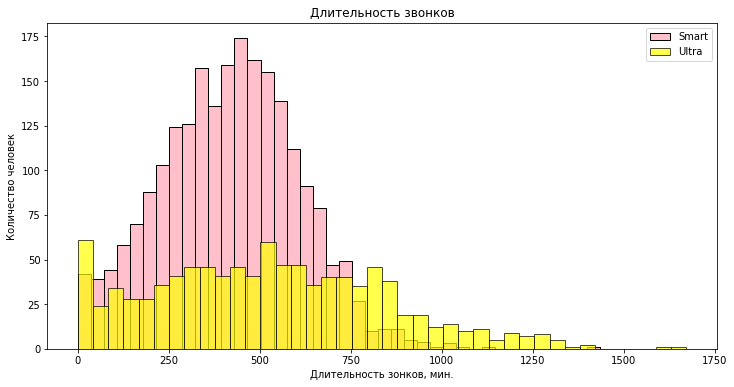

In [57]:
df_smart['Длительность звонков'].plot(kind='hist', bins=40, figsize=(12,6), ec='black', color='pink', label = 'Smart', title='Длительность звонков')
df_ultra['Длительность звонков'].plot(kind='hist', bins=40, figsize=(12,6), ec='black', color='yellow', alpha=0.7, label = 'Ultra')
plt.legend()
plt.xlabel('Длительность зонков, мин.')
plt.ylabel('Количество человек')
plt.show()

### Вывод:

В обоих тарифах в среднем при звонках пользователи укладываются в пакетные минуты. Что интересно, в тарифе Ультра в среднем используется только примерно 1/6 часть всех минут, включенных в абонентскую плату.


<a id='3.2'></a>
### 3.2 Сколько сообщений требуется пользователям каждого тарифа в месяц

In [58]:
df.sample(5)

,user_id,month,Количество звонков,Длительность звонков,Количество сообщений,Сумма трафика,Тариф,Город,Минуты сверх лимита,Сообщения сверх лимита,"Интернет сверх лимита, Гб",Доп. оплата,Выручка за месяц
2356,1373,2018-11-01,2.0,20.0,41.0,16764.0,smart,Улан-Удэ,0.0,0.0,2,400,950
2173,1341,2018-12-01,134.0,1233.0,58.0,27259.0,ultra,Москва,0.0,0.0,0,0,1950
232,1036,2018-08-01,60.0,554.0,3.0,16855.0,smart,Санкт-Петербург,54.0,0.0,2,562,1112
707,1111,2018-11-01,46.0,347.0,2.0,11412.0,smart,Казань,0.0,0.0,0,0,550
1133,1177,2018-07-01,46.0,454.0,0.0,15726.0,smart,Новосибирск,0.0,0.0,1,200,750


***Дисперсия, стандартное отклонение***

In [59]:
dispersion_smart_sms = df_smart['Количество сообщений'].var()
print(dispersion_smart_sms)
dispersion_ultra_sms = df_ultra['Количество сообщений'].var()
print(dispersion_ultra_sms)

796.8129584480083
2285.266142544674


In [60]:
std_smart_sms = df_smart['Количество сообщений'].std()
print(std_smart_sms)
std_ultra_sms = df_ultra['Количество сообщений'].std()
print(std_ultra_sms)

28.22787555676141
47.80445735017472


***Среднее значение, медиана***

In [61]:
mean_smart_sms = df_smart['Количество сообщений'].mean()
print(mean_smart_sms)
mean_ultra_sms = df_ultra['Количество сообщений'].mean()
print(mean_ultra_sms)

33.384028712427096
49.36345177664975


In [62]:
median_smart_sms = df_smart['Количество сообщений'].median()
print(median_smart_sms)
median_ultra_sms = df_ultra['Количество сообщений'].median()
print(median_ultra_sms)

28.0
38.0


***Построим гистограмму для количества сообщений***

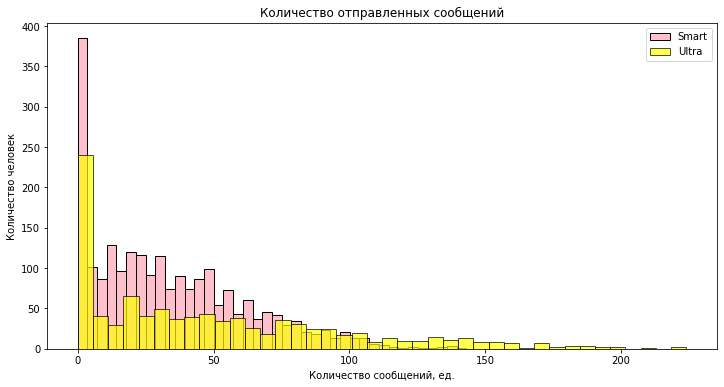

In [63]:
df_smart['Количество сообщений'].plot(kind='hist', bins=40, figsize=(12,6), ec='black', color='pink', label = 'Smart', title='Количество отправленных сообщений')
df_ultra['Количество сообщений'].plot(kind='hist', bins=40, figsize=(12,6), ec='black', color='yellow', alpha=0.7, label = 'Ultra')
plt.legend()
plt.xlabel('Количество сообщений, ед.')
plt.ylabel('Количество человек')
plt.show()

### Вывод

В обоих тарифах большая часть пользователей практически не использует сообщения как средство связи, а из тех, кто пользуется в среднем все укладываются в пакет своей абонентской платы. И снова, пользователи тарифа Ультра практически не используют возможности по количеству бесплатных сообщений, включенных в аб. плату.

<a id='3.3'></a>
### 3.3 Какой объём интернет-трафика требуется пользователям каждого тарифа в месяц

In [64]:
df.sample(5)

,user_id,month,Количество звонков,Длительность звонков,Количество сообщений,Сумма трафика,Тариф,Город,Минуты сверх лимита,Сообщения сверх лимита,"Интернет сверх лимита, Гб",Доп. оплата,Выручка за месяц
2429,1381,2018-07-01,86.0,673.0,29.0,26800.0,ultra,Москва,0.0,0.0,0,0,1950
334,1054,2018-06-01,65.0,527.0,69.0,19380.0,smart,Омск,27.0,19.0,4,938,1488
443,1069,2018-12-01,38.0,349.0,56.0,11367.0,smart,Екатеринбург,0.0,6.0,0,18,568
2585,1402,2018-12-01,71.0,596.0,22.0,26298.0,ultra,Пенза,0.0,0.0,0,0,1950
2600,1404,2018-10-01,28.0,275.0,59.0,17422.0,smart,Иркутск,0.0,9.0,3,627,1177


***Дисперсия, стандартное отклонение***

In [65]:
dispersion_smart_internet = df_smart['Сумма трафика'].var()
print(dispersion_smart_internet)
dispersion_ultra_internet = df_ultra['Сумма трафика'].var()
print(dispersion_ultra_internet)

34545911.12695753
101935621.04821923


In [66]:
std_smart_internet = df_smart['Сумма трафика'].std()
print(std_smart_internet)
std_ultra_internet = df_ultra['Сумма трафика'].std()
print(std_ultra_internet)

5877.576977544193
10096.317202238608


***Среднее значение, медиана***

In [67]:
mean_smart_internet = df_smart['Сумма трафика'].mean()
print(mean_smart_internet)
mean_ultra_internet = df_ultra['Сумма трафика'].mean()
print(mean_ultra_internet)

16229.188425302826
19486.90152284264


In [68]:
median_smart_internet = df_smart['Сумма трафика'].median()
print(median_smart_internet)
median_ultra_internet = df_ultra['Сумма трафика'].median()
print(median_ultra_internet)

16531.0
19324.0


***Построим гистограмму для количества потраченного трафика***

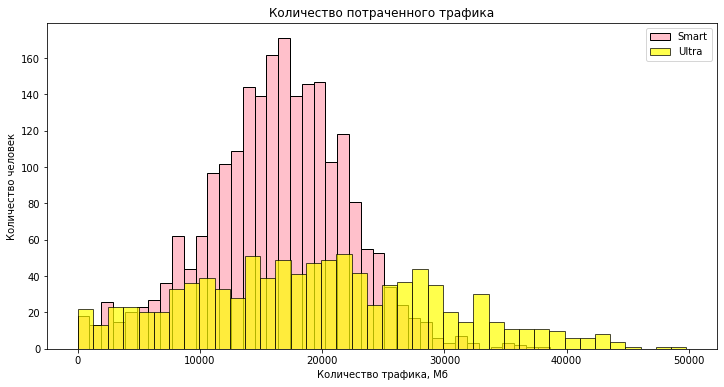

In [69]:
df_smart['Сумма трафика'].plot(kind='hist', bins=40, figsize=(12,6), ec='black', color='pink', label = 'Smart', title='Количество потраченного трафика')
df_ultra['Сумма трафика'].plot(kind='hist', bins=40, figsize=(12,6), ec='black', color='yellow', alpha=0.7, label = 'Ultra')
plt.legend()
plt.xlabel('Количество трафика, Мб')
plt.ylabel('Количество человек')
plt.show()

***Визуаизируем количество пользователей каждого тарифа и выручку за год по каждому тарифу***

In [70]:
df.groupby('Тариф')['user_id'].nunique()

Тариф
smart    350
ultra    148
Name: user_id, dtype: int64

Тариф
smart    350
ultra    148
Name: user_id, dtype: int64


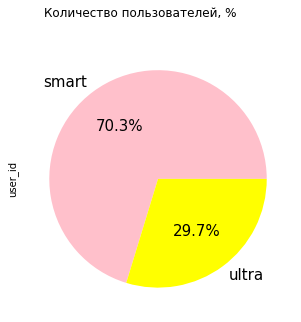

In [71]:
print(df.groupby('Тариф')['user_id'].nunique())
df.groupby('Тариф')['user_id'].nunique().plot(kind='pie', subplots=True, fontsize=15, colors={'pink', 'yellow'},
                                                                    autopct='%.1f%%', 
                                                                     title = 'Количество пользователей, %',
                                                                     figsize=(20,5))
plt.show()
                                                            

Тариф
smart    2885751
ultra    2040000
Name: Выручка за месяц, dtype: int64


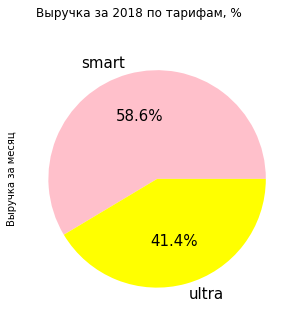

In [72]:
print(df.groupby('Тариф')['Выручка за месяц'].sum())
df.groupby('Тариф')['Выручка за месяц'].sum().plot(kind='pie', subplots=True, fontsize=15, colors={'pink', 'yellow'},
                                                                    autopct='%.1f%%', 
                                                                     title = 'Выручка за 2018 по тарифам, %',
                                                                     figsize=(20,5))
plt.show()

***Сводная информация по тарифам***

In [73]:
df_mean = pd.DataFrame ({
'Тариф': ['Smart', 'Ultra'],
'Пользователи, чел': [350, 148],
'Выручка за 2018 год, руб': [2885751, 2040000],
'Звонки, мин': [422, 518],
'Сообщения, ед': [28, 38],
'Интернет-трафик, Мб': [16531, 19324],
})
df_mean

,Тариф,"Пользователи, чел","Выручка за 2018 год, руб","Звонки, мин","Сообщения, ед","Интернет-трафик, Мб"
0,Smart,350,2885751,422,28,16531
1,Ultra,148,2040000,518,38,19324


### Вывод

Рассмотрим основные отличия по использованию звонков, сообщений и интернета у пользователей, а также количество пользователей и выручку за год.

1. Большая часть пользователей, около 70%, предпочитают использовать более дешевый тариф Смарт;
2. При этом, примерно 59% выручки приходится также на тариф Смарт, несмотря на меньшую стоимость: по итогам года выручка за год по данному тарифу составила около 2,9 млн. руб., а по тарифу Ультра на порядок меньше, около 2,04 млн. руб.
3. Несмотря на количество сообщений, звонков и трафика, включенных в абонентскую плату по тарифу Ультра мы видим, что в среднем пользователи не исользуют и половины возможностей.
4. В ситуации с тарифом Смарт, в среднем пользователям недостаточно лимита по абонентской плате и им приходится дополнительно доплачивать за интернет-трафик сверх абонентской платы.

<a id='4'></a>
# Шаг 4.  Проверка гипотез


<a id='4.1'></a>
### 4.1 Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

* Нулевая гипотеза H0: средняя выручка пользователей тарифа Smart НЕ отличается (то есть равна) от средней выручки пользователей тарифа Ultra
* Альтернативная гипотеза H1: средняя выручка пользователей тарифа Smart отличается от средней выручки пользователей тарифа Ultra

***Проверка на выбросы***

In [74]:
df_smart.sample(5)

,user_id,month,Количество звонков,Длительность звонков,Количество сообщений,Сумма трафика,Тариф,Город,Минуты сверх лимита,Сообщения сверх лимита,"Интернет сверх лимита, Гб",Доп. оплата,Выручка за месяц
1649,1262,2018-04-01,36.0,313.0,45.0,17161.0,smart,Ульяновск,0.0,0.0,2,400,950
3161,1490,2018-11-01,31.0,282.0,47.0,18733.0,smart,Москва,0.0,0.0,4,800,1350
525,1083,2018-09-01,57.0,548.0,54.0,17252.0,smart,Сочи,48.0,4.0,2,556,1106
2624,1409,2018-07-01,73.0,643.0,41.0,19335.0,smart,Набережные Челны,143.0,0.0,4,1229,1779
2934,1457,2018-08-01,53.0,494.0,26.0,8635.0,smart,Саратов,0.0,0.0,0,0,550


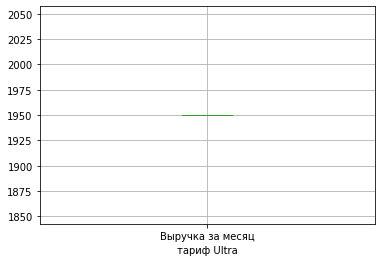

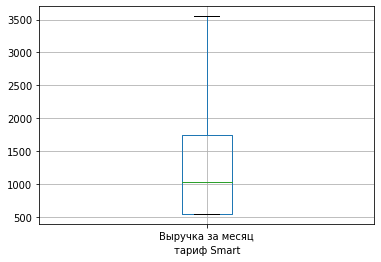

In [75]:
df_ultra.boxplot('Выручка за месяц', showfliers=False)
plt.xlabel('тариф Ultra')
plt.show()

df_smart.boxplot('Выручка за месяц', showfliers=False)
plt.xlabel('тариф Smart')
plt.show()

***Определим интервалы у ящика с усами***

In [76]:
def intervals(column, data):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    R = q3 - q1 
    left_int = q1 - 1.5*R
    right_int = q3 + 1.5*R
    return (left_int, right_int)

In [77]:
intervals('Выручка за месяц', df_smart)

(-1250.0, 3550.0)

In [78]:
intervals('Выручка за месяц', df_ultra)

(1950.0, 1950.0)

In [79]:
df_ultra_rev = df_ultra[(df_ultra['Выручка за месяц'] <= 1950) & (df_ultra['Выручка за месяц'] >= 1950)]['Выручка за месяц']
df_smart_rev = df_smart[(df_smart['Выручка за месяц'] <= 3550) & (df_smart['Выручка за месяц'] >= 0)]['Выручка за месяц']
df_smart_rev

8       1350
9        550
10       550
11      1150
12      1550
        ... 
3209    1750
3210     550
3211    1150
3212    1513
3213     598
Name: Выручка за месяц, Length: 2197, dtype: int64

***Рассчитаем p-value*** 

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind()

In [80]:
from scipy import stats as st

results = st.ttest_ind(df_smart_rev, df_ultra_rev)
print('p-значение: ', results.pvalue)
print('пороговое значение alpha = 0.05')

p-значение:  4.6244593528593796e-153
пороговое значение alpha = 0.05


In [81]:
#проверка
print(df_smart_rev.mean())
print(df_ultra_rev.mean())

1249.741010468821
1950.0


### Вывод:

H0 отвергаем, принимаем альтернативную гипотезу, что  средняя выручка пользователей тарифа Smart отличается от средней выручки пользователей тарифа Ultra

<a id='4.2'></a>
### 4.2 Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

* Нулевая гипотеза H0: средняя выручка пользователей из Москвы НЕ отличается (то есть равна) от средней выручки пользователей из других регионов
* Альтернативная гипотеза H1: средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов

In [82]:
df.sample(5)

,user_id,month,Количество звонков,Длительность звонков,Количество сообщений,Сумма трафика,Тариф,Город,Минуты сверх лимита,Сообщения сверх лимита,"Интернет сверх лимита, Гб",Доп. оплата,Выручка за месяц
985,1155,2018-06-01,36.0,289.0,40.0,16476.0,smart,Ставрополь,0.0,0.0,2,400,950
659,1104,2018-05-01,31.0,248.0,79.0,19532.0,ultra,Нижний Тагил,0.0,0.0,0,0,1950
1282,1200,2018-09-01,70.0,560.0,57.0,17853.0,ultra,Санкт-Петербург,0.0,0.0,0,0,1950
2319,1368,2018-12-01,45.0,403.0,89.0,20500.0,smart,Омск,0.0,39.0,6,1317,1867
2268,1359,2018-09-01,60.0,521.0,17.0,13977.0,smart,Москва,21.0,0.0,0,63,613


In [83]:
Moscow = df[(df['Город'] == 'Москва')]
not_Moscow = df[(df['Город'] != 'Москва')]

***Проверка на выбросы***

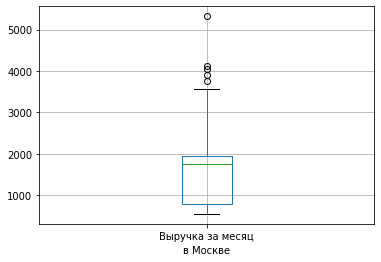

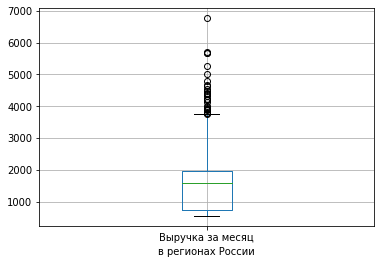

In [84]:
Moscow.boxplot('Выручка за месяц')
plt.xlabel('в Москве')
plt.show()

not_Moscow.boxplot('Выручка за месяц')
plt.xlabel('в регионах России')
plt.show()

In [85]:
Revenue_Moscow = Moscow[(Moscow['Выручка за месяц'] >= 500) & (Moscow['Выручка за месяц'] <= 3700)]['Выручка за месяц']
Revenue_not_Moscow = not_Moscow[(not_Moscow['Выручка за месяц'] >= 500) & (not_Moscow['Выручка за месяц'] <= 3600)]['Выручка за месяц']
Revenue_not_Moscow

0       1950
1       1950
2       1950
3       1950
4       1950
        ... 
3209    1750
3210     550
3211    1150
3212    1513
3213     598
Name: Выручка за месяц, Length: 2559, dtype: int64

***Рассчитаем p-value*** 

In [86]:
from scipy import stats as st

results = st.ttest_ind(Revenue_Moscow, Revenue_not_Moscow)
print('p-значение: ', results.pvalue)
print('пороговое значение alpha = 0.05')

p-значение:  0.15085269049244385
пороговое значение alpha = 0.05


In [87]:
#проверка
print(Revenue_Moscow.mean())
print(Revenue_not_Moscow.mean())

1528.7211221122113
1481.608050019539


### Вывод

H0 не можем отвергнуть, принимаем, что средняя выручка пользователей из Москвы НЕ отличается (то есть равна) от средней выручки пользователей из других регионов. (по вычислениям видим, что разница примерно в 50 руб. - это незначительное отклонение)

<a id='5'></a>
# Шаг 5.  Общий вывод

При анализе мы использовали небольшую выбору пользователей (500 чел.) тарифов Смарт и Ультра компании "Мегалайн" с данными за 2018 год по:
* количеству и длительности звонков;
* количеству отправленных сообщений;
* по количеству использованного интернета.
* также в нашем распоряжении было описание тарифов с указанием стоимости абонентской платы и стоимости услуг сверх тарифного пакета. 

На **первом этапе** были изучены все входные предоставленные данные: 
* проверили на наличие дубликатов  -не обнаружили;
* изменили тип данных в столбцах с датами для удобства ведения дальнейших расчетов;
* в таблице по звонкам избавились от данных с нулевой длительностью, так как стоимость таких звонков 0 руб. и для дальнейшего анализа данные не пригодятся.
* учли особенности компании "Мегалайн" - так как компания Мегалайн» всегда округляет вверх значения минут и мегабайтов в большую сторону, мы оруглили данные по использованию трафика и длительности звонков, соответственно, к большему значению.
* проверили на пропуски - в предоставленных данных пропущенные значения были только в колонке с датой прекращения пользования тарифом, так как по условию известно, что если значение пропущено в данном столбце, то тариф ещё действовал на момент выгрузки данных, оставили пропуски без изменений.

На **втором этапе** для удобства расчетов мы свели все имеющиеся данные в одну сводную таблицу. 
* Для расчета выручки по каждому пользователю мы добавили информацию по использованию звонков, сообщений и интернета сверх установленного пакетом лимита.
* Полученные данные позволили нам посчитать общую выручку по каждому тарифу за 2018 год:
   - Тариф Ультра - 2029556 руб.
   - Тариф Смарт - 2748486 руб.
   
На **третьем этапе** мы провели статистический анализ для детализации полученных цифр по выручке за год, чтобы понимать за счет чего выручка по тарифу "Смарт" с меньшей стоимостью абонентской платы на порядок превышает выручку по пакету "Ультра", а также проследить поведение пользователей и выяснили, что:
* около 70% пользователей предпочитает тариф "Смарт"
* в среднем пользователи тарифа "Смарт" тратят 422 мин. на звонки и 28 сообщений, что входит в обанентскую плату, но не укладываются в лимит по интернет-трафику примерно на 1,5 ГБ, за что доплачивают.
* в свою очередь пользователи тарифа "Ультра" тратят 518 минут на звонки при лимите в 3000 минут и 38 сообщений из 1000 оплаченных аб. платой, в по интернету также укладываются и тратят в среднем 19 Гб из 30 Гб возможных.

На **четвертом этапе** мы проверили 2 гипотезы с помощью T-критерий Стьюдента:
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается - и действительно, приняли альтернативную гипотезу, что средняя выручка пользователей тарифа Smart отличается от средней выручки пользователей тарифа Ultra
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов - приняли нулевую гипотезу, что средняя выручка пользователей из Москвы НЕ отличается от средней выручки пользователей из других регионов.

**Рекомендации:**

По итогам анализа мы видим, что пользователям тарифа Смарт приносят больше денег в компанию и в целом он более востребован среди пользователей. Одноко, большинству не хватает установленного лимита по интернету, а пользователи тарифа Ультра не используют все оплаченные возможности. Стоит рассмотреть создание промежуточного пакета, который бы удовлетворял по лимитам запросы пользователей Смарт и позволил части пользователей тарифа Ультра также перейти на более приемлемый вариант.